# 영업 성공 여부 분류 경진대회

## 1. 데이터 확인

### 필수 라이브러리

In [1]:
!pip install pandas

In [2]:
!pip install numpy

In [3]:
!pip install scikit-learn

In [4]:
!pip install matplotlib

In [5]:
!pip install seaborn

In [6]:
import pandas as pd
import numpy as np
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\hjs00\AppData\Local\Temp\ipykernel_19356\1451136532.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### 데이터 셋 읽어오기

In [7]:
df_train = pd.read_csv("train.csv") # 학습용 데이터
df_test = pd.read_csv("submission.csv") # 테스트 데이터(제출파일의 데이터)

In [8]:
df_train.head() # 학습용 데이터 살펴보기

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,...,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted
0,1.0,/Quezon City/Philippines,AS,0.066667,32160,End-Customer,Enterprise,NaN,NaN,NaN,...,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Engineering,0,True
1,1.0,/PH-00/Philippines,AS,0.066667,23122,End-Customer,Enterprise,12.0,NaN,NaN,...,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Advertising,1,True
2,1.0,/Kolkata /India,AS,0.088889,1755,End-Customer,Enterprise,144.0,NaN,NaN,...,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,Construction,2,True
3,1.0,/Bhubaneswar/India,AS,0.088889,4919,End-Customer,Enterprise,NaN,NaN,NaN,...,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,IT/Software,3,True
4,1.0,/Hyderabad/India,AS,0.088889,17126,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,...,LGEIL,less than 3 months,0,0,0.003079,0.026846,corporate / office,NaN,4,True


In [9]:
df_test.head()

,id,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,...,customer_position,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner
0,19844,0.00,/ / Brazil,ID,0.073248,47466,End Customer,Enterprise,53.0,NaN,...,none,LGESP,NaN,1,0,0.001183,0.049840,retail,Electronics & Telco,278
1,9738,0.25,400 N State Of Franklin Rd Cloud IT / Johnson...,IT,NaN,5405,End Customer,SMB,NaN,NaN,...,none,LGEUS,NaN,0,0,0.000013,NaN,transportation,Others,437
2,8491,1.00,/ / U.A.E,ID,NaN,13597,Specifier/ Influencer,SMB,NaN,NaN,...,manager,LGEGF,less than 3 months,0,0,0.000060,0.131148,hospital & health care,General Hospital,874
3,19895,0.50,/ Madison / United States,ID,0.118644,17204,NaN,Enterprise,NaN,NaN,...,none,LGEUS,more than a year,0,0,0.001183,0.049840,retail,NaN,194
4,10465,1.00,/ Sao Paulo / Brazil,ID,0.074949,2329,End Customer,Enterprise,2.0,1.0,...,others,LGESP,less than 3 months,1,1,0.003079,0.064566,corporate / office,Engineering,167


In [10]:
# 학습 데이터 행수, 열수 확인
print("학습 데이터 확인")
print(df_train.shape)
# 학습 데이터형 확인
print(df_train.dtypes)
print("테스트 데이터 확인")
# 테스트 데이터 행수, 열수 확인
print(df_test.shape)
# 테스트 데이터형 확인
print(df_test.dtypes)

학습 데이터 확인
(59299, 29)
bant_submit                float64
customer_country            object
business_unit               object
com_reg_ver_win_rate       float64
customer_idx                 int64
customer_type               object
enterprise                  object
historical_existing_cnt    float64
id_strategic_ver           float64
it_strategic_ver           float64
idit_strategic_ver         float64
customer_job                object
lead_desc_length             int64
inquiry_type                object
product_category            object
product_subcategory         object
product_modelname           object
customer_country.1          object
customer_position           object
response_corporate          object
expected_timeline           object
ver_cus                      int64
ver_pro                      int64
ver_win_rate_x             float64
ver_win_ratio_per_bu       float64
business_area               object
business_subarea            object
lead_owner                   int6

In [11]:
# 학습 데이터의 결손값의 갯수
# 행에 대한 갯수
print(df_train.isnull().any(axis=1))
# 열에 대한 갯수
print(df_train.isnull().any(axis=0))
# 텍스트 데이터의 결손값
# 행에 대한 갯수
print(df_test.isnull().any(axis=1))
# 열에 대한 갯수
print(df_test.isnull().any(axis=0))

0        True
1        True
2        True
3        True
4        True
         ... 
59294    True
59295    True
59296    True
59297    True
59298    True
Length: 59299, dtype: bool
bant_submit                False
customer_country            True
business_unit              False
com_reg_ver_win_rate        True
customer_idx               False
customer_type               True
enterprise                 False
historical_existing_cnt     True
id_strategic_ver            True
it_strategic_ver            True
idit_strategic_ver          True
customer_job                True
lead_desc_length           False
inquiry_type                True
product_category            True
product_subcategory         True
product_modelname           True
customer_country.1          True
customer_position          False
response_corporate         False
expected_timeline           True
ver_cus                    False
ver_pro                    False
ver_win_rate_x              True
ver_win_ratio_per_bu       

In [12]:
# 학습 데이터
# 행의 방향에 대해서 결손값의 수 조사
print(df_train.isnull().sum(axis=1))
# 열의 방향에 대해서 결손값의 수 조사.
print(df_train.isnull().sum(axis=0))
# 테스트 데이터
# 행의 방향에 대해서 결손값의 수 조사
print(df_test.isnull().sum(axis=1))
# 열의 방향에 대해서 결손값의 수 조사
print(df_test.isnull().sum(axis=0))

0         6
1         5
2         5
3         6
4         7
         ..
59294     7
59295     8
59296     8
59297     8
59298    10
Length: 59299, dtype: int64
bant_submit                    0
customer_country             982
business_unit                  0
com_reg_ver_win_rate       44731
customer_idx                   0
customer_type              43961
enterprise                     0
historical_existing_cnt    45543
id_strategic_ver           55855
it_strategic_ver           58178
idit_strategic_ver         54734
customer_job               18733
lead_desc_length               0
inquiry_type                 941
product_category           19374
product_subcategory        50064
product_modelname          50070
customer_country.1           982
customer_position              0
response_corporate             0
expected_timeline          30863
ver_cus                        0
ver_pro                        0
ver_win_rate_x             40882
ver_win_ratio_per_bu       43995
business_area  

In [13]:
# is_converted 결측치 보완
df_train['is_converted'] = df_train['is_converted'].fillna(df_train['is_converted'].value_counts(sort=True, ascending=False).index[0])
df_train['is_converted'] = df_train['is_converted'].astype(int)

In [14]:

# 학습 데이터 describe 이용
df_train.describe()

,bant_submit,com_reg_ver_win_rate,customer_idx,historical_existing_cnt,id_strategic_ver,it_strategic_ver,idit_strategic_ver,lead_desc_length,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,lead_owner,is_converted
count,59299.000000,14568.000000,59299.000000,13756.000000,3444.0,1121.0,4565.0,59299.000000,59299.000000,59299.000000,18417.000000,15304.000000,59299.000000,59299.000000
mean,0.634593,0.091685,27114.556333,19.912184,1.0,1.0,1.0,79.271590,0.041603,0.050810,0.001117,0.049288,262.563888,0.081789
std,0.286066,0.150988,14653.911888,44.697938,0.0,0.0,0.0,132.551067,0.199681,0.219612,0.001104,0.027949,231.605681,0.274045
min,0.000000,0.003788,2.000000,0.000000,1.0,1.0,1.0,1.000000,0.000000,0.000000,0.000002,0.011583,0.000000,0.000000
25%,0.500000,0.019900,14913.000000,1.000000,1.0,1.0,1.0,7.000000,0.000000,0.000000,0.000298,0.026846,97.000000,0.000000
50%,0.500000,0.049180,26774.000000,4.000000,1.0,1.0,1.0,29.000000,0.000000,0.000000,0.000572,0.049840,175.000000,0.000000
75%,1.000000,0.074949,40368.500000,19.000000,1.0,1.0,1.0,92.000000,0.000000,0.000000,0.001183,0.064566,374.000000,0.000000
max,1.000000,1.000000,47466.000000,1394.000000,1.0,1.0,1.0,1264.000000,1.000000,1.000000,0.003079,0.285714,1114.000000,1.000000


In [15]:
# 테스트 데이터 describe
df_test.describe()

,id,bant_submit,com_reg_ver_win_rate,customer_idx,historical_existing_cnt,id_strategic_ver,it_strategic_ver,idit_strategic_ver,lead_desc_length,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,lead_owner
count,5271.000000,5271.000000,1788.000000,5271.000000,1275.000000,593.0,53.0,646.0,5271.000000,5271.000000,5271.000000,2373.000000,1906.000000,5271.000000
mean,10686.395940,0.605720,0.102336,24664.497629,21.272941,1.0,1.0,1.0,81.816164,0.146841,0.081389,0.001093,0.058388,304.458736
std,6141.012698,0.365631,0.151790,14615.896802,75.187401,0.0,0.0,0.0,135.063265,0.353981,0.273457,0.001189,0.035738,241.502331
min,1.000000,0.000000,0.003788,1.000000,0.000000,1.0,1.0,1.0,1.000000,0.000000,0.000000,0.000002,0.011583,0.000000
25%,5644.000000,0.250000,0.032787,11173.500000,0.000000,1.0,1.0,1.0,3.000000,0.000000,0.000000,0.000060,0.048630,97.000000
50%,10067.000000,0.500000,0.053892,24151.000000,4.000000,1.0,1.0,1.0,26.000000,0.000000,0.000000,0.000572,0.053571,231.000000
75%,16019.500000,1.000000,0.075000,37680.000000,19.000000,1.0,1.0,1.0,104.000000,0.000000,0.000000,0.001183,0.064566,428.000000
max,21340.000000,1.000000,1.000000,47466.000000,2219.000000,1.0,1.0,1.0,1143.000000,1.000000,1.000000,0.003079,0.285714,1108.000000


customer_country=> country로 마지막 맨 뒤에 있는 부분만 추출하기

In [16]:
# 나라만 가지고 / 중 가장 마지막 부분 추출
df_train['country'] = df_train['customer_country'].str.split('/').str[2]

bant_submit을 이용해서 예산 체크 유무 확인하기

In [17]:
# customer_idx, business_area 확인
df_train_customer_business = df_train[['bant_submit', 'customer_position', 'inquiry_type', 'expected_timeline']]
df_train_customer_business.head()

,bant_submit,customer_position,inquiry_type,expected_timeline
0,1.0,entry level,Quotation or purchase consultation,less than 3 months
1,1.0,ceo/founder,Quotation or purchase consultation,less than 3 months
2,1.0,partner,Product Information,less than 3 months
3,1.0,ceo/founder,Quotation or purchase consultation,less than 3 months
4,1.0,partner,Quotation or purchase consultation,less than 3 months


In [18]:
df_train['customer_position'] = df_train['customer_position'].replace(to_replace='none', value=np.nan)

In [19]:
df_train['bant_submit_semi'] = df_train[['customer_position', 'inquiry_type', 'expected_timeline']].notnull().sum(axis=1)

In [20]:
df_train['bant_submit_total_count'] = df_train['bant_submit'].apply(lambda x: 4.0 if x == 1.0 else (3.0 if x == 0.75 else (2.0 if x == 0.5 else (1.0 if x == 0.25 else 0.0))))
df_train['bant_submit_total_count'] = df_train['bant_submit_total_count'].astype(int)

In [21]:
df_train['budget_check'] = df_train['bant_submit_total_count'] - df_train['bant_submit_semi']
df_train = df_train.drop(['bant_submit_semi', 'bant_submit_total_count'], axis=1)
df_train.head()

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,...,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted,country,budget_check
0,1.0,/Quezon City/Philippines,AS,0.066667,32160,End-Customer,Enterprise,NaN,NaN,NaN,...,1,0,0.003079,0.026846,corporate / office,Engineering,0,1,Philippines,1
1,1.0,/PH-00/Philippines,AS,0.066667,23122,End-Customer,Enterprise,12.0,NaN,NaN,...,1,0,0.003079,0.026846,corporate / office,Advertising,1,1,Philippines,1
2,1.0,/Kolkata /India,AS,0.088889,1755,End-Customer,Enterprise,144.0,NaN,NaN,...,1,0,0.003079,0.026846,corporate / office,Construction,2,1,India,1
3,1.0,/Bhubaneswar/India,AS,0.088889,4919,End-Customer,Enterprise,NaN,NaN,NaN,...,1,0,0.003079,0.026846,corporate / office,IT/Software,3,1,India,1
4,1.0,/Hyderabad/India,AS,0.088889,17126,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,...,0,0,0.003079,0.026846,corporate / office,NaN,4,1,India,1


business_unit 이용하여서 as_strategic_ver, solution_strategic_ver 항목을 가중치 유무 확인하기

In [22]:
df_train['business_unit'].value_counts(sort=True, ascending=False)

business_unit
ID          25563
AS          24774
IT           8664
Solution      296
CM              2
Name: count, dtype: int64

In [23]:
df_train['as_strategic_ver'] = df_train['business_unit'].apply(lambda x: 1.0 if x == 'AS' else 0.0)
df_train['solution_strategic_ver'] = df_train['business_unit'].apply(lambda x: 1.0 if x == 'Solution' else 0.0)

In [24]:
df_train.head()

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,...,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted,country,budget_check,as_strategic_ver,solution_strategic_ver
0,1.0,/Quezon City/Philippines,AS,0.066667,32160,End-Customer,Enterprise,NaN,NaN,NaN,...,0.003079,0.026846,corporate / office,Engineering,0,1,Philippines,1,1.0,0.0
1,1.0,/PH-00/Philippines,AS,0.066667,23122,End-Customer,Enterprise,12.0,NaN,NaN,...,0.003079,0.026846,corporate / office,Advertising,1,1,Philippines,1,1.0,0.0
2,1.0,/Kolkata /India,AS,0.088889,1755,End-Customer,Enterprise,144.0,NaN,NaN,...,0.003079,0.026846,corporate / office,Construction,2,1,India,1,1.0,0.0
3,1.0,/Bhubaneswar/India,AS,0.088889,4919,End-Customer,Enterprise,NaN,NaN,NaN,...,0.003079,0.026846,corporate / office,IT/Software,3,1,India,1,1.0,0.0
4,1.0,/Hyderabad/India,AS,0.088889,17126,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,...,0.003079,0.026846,corporate / office,NaN,4,1,India,1,1.0,0.0


In [25]:
# 'enterprise' 가산점 부여하기
print(df_train['enterprise'].value_counts(sort=True, ascending=False))

enterprise
Enterprise    37783
SMB           21516
Name: count, dtype: int64


In [26]:
print(df_train[df_train['is_converted'] == False]['enterprise'].value_counts(sort=True, ascending=False))

enterprise
Enterprise    35669
SMB           18780
Name: count, dtype: int64


In [27]:
df_train['enterprise_point'] = df_train['enterprise'].apply(lambda x: 1.0 if x=='SMB' else 0.0)

In [28]:
df_train.head()

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,...,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted,country,budget_check,as_strategic_ver,solution_strategic_ver,enterprise_point
0,1.0,/Quezon City/Philippines,AS,0.066667,32160,End-Customer,Enterprise,NaN,NaN,NaN,...,0.026846,corporate / office,Engineering,0,1,Philippines,1,1.0,0.0,0.0
1,1.0,/PH-00/Philippines,AS,0.066667,23122,End-Customer,Enterprise,12.0,NaN,NaN,...,0.026846,corporate / office,Advertising,1,1,Philippines,1,1.0,0.0,0.0
2,1.0,/Kolkata /India,AS,0.088889,1755,End-Customer,Enterprise,144.0,NaN,NaN,...,0.026846,corporate / office,Construction,2,1,India,1,1.0,0.0,0.0
3,1.0,/Bhubaneswar/India,AS,0.088889,4919,End-Customer,Enterprise,NaN,NaN,NaN,...,0.026846,corporate / office,IT/Software,3,1,India,1,1.0,0.0,0.0
4,1.0,/Hyderabad/India,AS,0.088889,17126,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,...,0.026846,corporate / office,NaN,4,1,India,1,1.0,0.0,0.0


In [29]:
df_train['id_strategic_ver'] = df_train['id_strategic_ver'].fillna(0.0)
df_train['it_strategic_ver'] = df_train['it_strategic_ver'].fillna(0.0)
df_train['idit_strategic_ver'] = df_train['idit_strategic_ver'].fillna(0.0)

In [30]:
df_train_idit = df_train[['id_strategic_ver', 'it_strategic_ver', 'idit_strategic_ver', 'as_strategic_ver', 'solution_strategic_ver', 'is_converted']]

In [31]:
df_train_idit.corr()

,id_strategic_ver,it_strategic_ver,idit_strategic_ver,as_strategic_ver,solution_strategic_ver,is_converted
id_strategic_ver,1.000000,-0.034469,0.859822,-0.210345,-0.017588,0.014028
it_strategic_ver,-0.034469,1.000000,0.480653,-0.117586,-0.009832,-0.035554
idit_strategic_ver,0.859822,0.480653,1.000000,-0.244637,-0.020455,-0.005856
as_strategic_ver,-0.210345,-0.117586,-0.244637,1.000000,-0.059998,-0.080258
solution_strategic_ver,-0.017588,-0.009832,-0.020455,-0.059998,1.000000,-0.018520
is_converted,0.014028,-0.035554,-0.005856,-0.080258,-0.018520,1.000000


idit_strategic_ver이 id_strategic_ver보다 많이 편중되었다.

<Axes: >

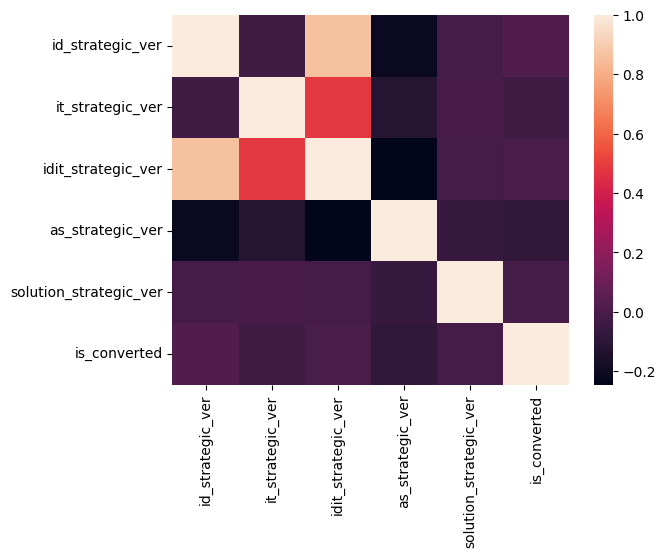

In [32]:
sns.heatmap(df_train_idit.corr())

In [33]:
df_train_corporate = df_train[['business_area', 'business_unit', 'country', 'com_reg_ver_win_rate']]

In [34]:
df_train_corporate[df_train['is_converted'] == True].value_counts(sort=True, ascending=False, normalize=True)

business_area           business_unit  country         com_reg_ver_win_rate
hospital & health care  IT             United States   0.642857                0.259784
corporate / office      ID             Brazil          0.074949                0.053289
                                       India           0.057534                0.024147
                                       United States   0.044643                0.023314
retail                  ID             Brazil          0.073248                0.023314
                                                                                 ...   
residential (home)      AS              Praia grande   0.003788                0.000833
public facility         IT             Costa Rica      0.200000                0.000833
factory                 AS              Karawang       0.136364                0.000833
public facility         ID             Saudi Arabia    0.037037                0.000833
hospital & health care  IT             Brazi

In [35]:
df_train['business_area_point'] = df_train['business_area'].apply(lambda x: 1.0 if x=='corporate / office' or x=='retail' or x=='education' or x=='hotel & accommodation' else 0.0)

In [36]:
df_train_corporate[(df_train_corporate['business_area'] == 'retail') & (df_train_corporate['business_unit'] == 'AS') & (df_train_corporate['country'] == 'India')]['com_reg_ver_win_rate'].value_counts(sort=True, ascending=False)

com_reg_ver_win_rate
0.028986    115
Name: count, dtype: int64

In [37]:
df_train[df_train['is_converted'] == True]['country'].value_counts(sort=True, ascending=False, normalize=True)

country
India            0.262399
United States    0.178938
Brazil           0.112956
Philippines      0.049596
U.A.E            0.046756
                   ...   
 Oregon          0.000218
Belgium          0.000218
Cyprus           0.000218
 BR              0.000218
 Karawang        0.000218
Name: proportion, Length: 170, dtype: float64

In [38]:
df_train['country_point'] = df_train['country'].apply(lambda x: 3.0 if x=='United States' else (2.0 if x=='Brazil' else (1.0 if x=='India' else 0.0)))

In [39]:
# 'customer_job' 최빈값 출력
print(df_train[df_train['is_converted'] == True]['customer_job'].value_counts(sort=True, ascending=False, normalize=True))

customer_job
engineering                         0.169868
information technology              0.098139
administrative                      0.097239
purchasing                          0.081333
other                               0.077431
education                           0.061224
business development                0.053121
sales                               0.042317
operations                          0.039316
consulting                          0.039016
marketing                           0.036315
entrepreneurship                    0.032413
arts and design                     0.025510
program and project management      0.023109
healthcare services                 0.019208
media and communication             0.015606
real estate                         0.014406
accounting                          0.010804
finance                             0.010204
support                             0.006903
product management                  0.005702
others                              0.0039

In [40]:
df_train['customer_job_point'] = df_train['customer_job'].apply(lambda x: 4.0 if x=='engineering' else (3.0 if x=='information technology' else (2.0 if x=='administrative' else (1.0 if x=='purchasing' else 0.0))))

In [41]:
# 'customer_type' 최빈값 출력
df_train[df_train['is_converted'] == True]['customer_type'].value_counts(sort=True, ascending=False, normalize=True)

customer_type
End-Customer              0.387410
End Customer              0.363869
Specifier/ Influencer     0.096725
Channel Partner           0.084954
Service Partner           0.025077
Solution Eco-Partner      0.022006
Specifier / Influencer    0.007677
Consultant                0.005629
Installer                 0.002559
Homeowner                 0.001535
Others                    0.001024
Architect/Consultant      0.001024
Installer/Contractor      0.000512
Name: proportion, dtype: float64

In [42]:
# 'customer_position' 최빈값 출력
print(df_train[df_train['is_converted'] == True]['customer_position'].value_counts(sort=True, ascending=False, normalize=True))

customer_position
manager                  0.258044
ceo/founder              0.205561
director                 0.135270
other                    0.129022
associate/analyst        0.101531
partner                  0.072477
entry level              0.030615
c-level executive        0.023118
vice president           0.013746
trainee                  0.007810
intern                   0.005623
others                   0.005623
unpaid                   0.001250
decision maker           0.001250
not applicable           0.000937
decision influencer      0.000937
no influence             0.000937
customer                 0.000937
decision-influencer      0.000625
decision-maker           0.000625
commercial consultant    0.000312
architecture/consult     0.000312
architect/consultant     0.000312
engineering              0.000312
guest faculty            0.000312
physics teacher          0.000312
physics faculty          0.000312
career coach             0.000312
co-founder               0.000

In [43]:
# 'customer_position' 최빈값 출력
print(df_train[df_train['is_converted'] == True]['customer_position'].value_counts(sort=True, ascending=False, normalize=True))

customer_position
manager                  0.258044
ceo/founder              0.205561
director                 0.135270
other                    0.129022
associate/analyst        0.101531
partner                  0.072477
entry level              0.030615
c-level executive        0.023118
vice president           0.013746
trainee                  0.007810
intern                   0.005623
others                   0.005623
unpaid                   0.001250
decision maker           0.001250
not applicable           0.000937
decision influencer      0.000937
no influence             0.000937
customer                 0.000937
decision-influencer      0.000625
decision-maker           0.000625
commercial consultant    0.000312
architecture/consult     0.000312
architect/consultant     0.000312
engineering              0.000312
guest faculty            0.000312
physics teacher          0.000312
physics faculty          0.000312
career coach             0.000312
co-founder               0.000

In [44]:
df_train['customer_position_point'] = df_train['customer_position'].apply(lambda x: 4.0 if x == 'ceo/founder' else (3.0 if x == 'manager' else (2.0 if x == 'director' else (1.0 if x == 'associate/analyst' else 0.0))))

In [45]:
# 'customer_type' 최빈값 출력
print(df_train[df_train['is_converted']==True]['customer_type'].value_counts(sort=True, ascending=False, normalize=True))

customer_type
End-Customer              0.387410
End Customer              0.363869
Specifier/ Influencer     0.096725
Channel Partner           0.084954
Service Partner           0.025077
Solution Eco-Partner      0.022006
Specifier / Influencer    0.007677
Consultant                0.005629
Installer                 0.002559
Homeowner                 0.001535
Others                    0.001024
Architect/Consultant      0.001024
Installer/Contractor      0.000512
Name: proportion, dtype: float64


In [46]:
# 'customer_job' 최빈값 출력하기
print(df_train[df_train['is_converted'] == True]['customer_job'].value_counts(sort=True, ascending=False, normalize=True))

customer_job
engineering                         0.169868
information technology              0.098139
administrative                      0.097239
purchasing                          0.081333
other                               0.077431
education                           0.061224
business development                0.053121
sales                               0.042317
operations                          0.039316
consulting                          0.039016
marketing                           0.036315
entrepreneurship                    0.032413
arts and design                     0.025510
program and project management      0.023109
healthcare services                 0.019208
media and communication             0.015606
real estate                         0.014406
accounting                          0.010804
finance                             0.010204
support                             0.006903
product management                  0.005702
others                              0.0039

In [47]:
# 'customer_job'
df_train['customer_job_point'] = df_train['customer_job'].apply(lambda x: 5.0 if x=='engineering' else (4.0 if x=='information technology' else (3.0 if x=='administrative' else (2.0 if x=='administrative' else (1.0 if x=='purchasing' else 0.0))))) 

In [48]:
# 'lead_desc_length'의 최빈값 구하기
print(df_train['lead_desc_length'].value_counts(sort=True, ascending=False, normalize=True))

lead_desc_length
3      0.175011
14     0.053627
2      0.015751
10     0.015026
4      0.014908
         ...   
824    0.000017
559    0.000017
676    0.000017
907    0.000017
726    0.000017
Name: proportion, Length: 909, dtype: float64


In [49]:
# inquiry_type 최빈값 구하기
df_train[df_train['is_converted'] == True]['inquiry_type'].value_counts(sort=True, ascending=False, normalize=True)

inquiry_type
Quotation or purchase consultation                                                                    0.423920
Quotation or Purchase Consultation                                                                    0.408598
Sales Inquiry                                                                                         0.118961
Usage or technical consultation                                                                       0.009151
Other                                                                                                 0.007448
Technical Consultation                                                                                0.007236
Request for Partnership                                                                               0.007023
Technical Support                                                                                     0.003618
Product Information                                                                                

In [50]:
# 'product_category' 요청 제품 카테고리 구하기
print(df_train[df_train['is_converted'] == True]['product_category'].value_counts(sort=True, ascending=False, normalize=True))

product_category
vrf                    0.142546
video wall signage     0.097388
multi-split            0.087867
interactive signage    0.084875
led signage            0.084331
                         ...   
cac                    0.000272
virtual production     0.000272
led cinema             0.000272
laec015                0.000272
tv 55"                 0.000272
Name: proportion, Length: 125, dtype: float64


In [51]:
df_train['product_category_point'] = df_train['product_category'].apply(lambda x: 1.0 if x=='video wall signage' or x=='interactive signage' or x=='led signage' or x=='oled signage' or x=='standard signage' or x=='hotel tv' or x=='high brightness signage' or x=='interactive signage' or x=='special signage' or x=='signage care solution' or x=='signage' or x=='digital signage' else 0.0)

In [52]:
df_train[df_train['is_converted'] == True]['product_subcategory'].value_counts(sort=True, ascending=False, normalize=True)

product_subcategory
Interactive Digital Board                        0.063338
TR3BF Series                                     0.037258
55" 500 nits FHD 0.44mm Even Bezel Video Wall    0.035022
49" 500 nits FHD Slim Bezel Video Wall           0.031297
Transparent OLED Signage                         0.030551
                                                   ...   
Video-wall OLED Signage                          0.000745
UR640S Series                                    0.000745
Virtual Production Series                        0.000745
LT341H Series                                    0.000745
Split                                            0.000745
Name: proportion, Length: 192, dtype: float64

In [53]:
df_train['product_subcategory_point'] = df_train['product_subcategory'].apply(lambda x: 5.0 if x=='Interactive Digital Board' else (4.0 if x=='TR3BF Series' else (3.0 if x=='55" 500 nits FHD 0.44mm Even Bezel Video Wall' else (2.0 if x=='49" 500 nits FHD Slim Bezel Video Wall' else (1.0 if x=='Transparent OLED Signage' else 0.0)))))

In [54]:
df_train['historical_existing_cnt'] = df_train['historical_existing_cnt'].fillna(0.0)

In [55]:
df_train.head()

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,...,budget_check,as_strategic_ver,solution_strategic_ver,enterprise_point,business_area_point,country_point,customer_job_point,customer_position_point,product_category_point,product_subcategory_point
0,1.0,/Quezon City/Philippines,AS,0.066667,32160,End-Customer,Enterprise,0.0,0.0,0.0,...,1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,1.0,/PH-00/Philippines,AS,0.066667,23122,End-Customer,Enterprise,12.0,0.0,0.0,...,1,1.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0
2,1.0,/Kolkata /India,AS,0.088889,1755,End-Customer,Enterprise,144.0,0.0,0.0,...,1,1.0,0.0,0.0,1.0,1.0,5.0,0.0,0.0,0.0
3,1.0,/Bhubaneswar/India,AS,0.088889,4919,End-Customer,Enterprise,0.0,0.0,0.0,...,1,1.0,0.0,0.0,1.0,1.0,0.0,4.0,0.0,0.0
4,1.0,/Hyderabad/India,AS,0.088889,17126,Specifier/ Influencer,Enterprise,0.0,0.0,0.0,...,1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [56]:
df_train[['product_category', 'is_converted']][df_train['is_converted'] == True]['product_category'].value_counts(sort=True, ascending=False)

product_category
vrf                    524
video wall signage     358
multi-split            323
interactive signage    312
led signage            310
                      ... 
cac                      1
virtual production       1
led cinema               1
laec015                  1
tv 55"                   1
Name: count, Length: 125, dtype: int64

In [57]:
# 'product_subcategory' 요청 제품 하위카테고리 구하기
print(df_train['product_subcategory'].value_counts(sort=True, ascending=False, normalize=True))

product_subcategory
All Medical Displays         0.048295
Interactive Digital Board    0.045154
TR3BF Series                 0.040498
Transparent OLED Signage     0.031186
Diagnostic Monitors          0.030753
                               ...   
49VL5J                       0.000108
Versatile                    0.000108
UM3F Series                  0.000108
All Monitors &PCs            0.000108
EVR                          0.000108
Name: proportion, Length: 330, dtype: float64


In [58]:
# 'product_modelname' 요청 제품 모델명 구하기
print(df_train[df_train['is_converted'] == True]['product_modelname'].value_counts(sort=True, ascending=False, normalize=True))

product_modelname
55VSM5J            0.041593
55CT5WJ            0.037168
43HT3WJ            0.030088
75TC3D             0.026549
55VSH7J            0.025664
                     ...   
LSBB009            0.000885
55UR765H (ASIA)    0.000885
43ML5K             0.000885
55EW5F EW5G        0.000885
Surgical           0.000885
Name: proportion, Length: 310, dtype: float64


In [59]:
df_train['product_modelname_point'] = df_train['product_modelname'].apply(lambda x: 5.0 if x=='UltraFine Ergo(32UN880)' else (4.0 if x=='28MQ780' else (3.0 if x=='All Medical Displays' else (2.0 if x=='43HT3WJ' else (1.0 if x=='55CT5WJ' else 0.0)))))

In [60]:
df_train[df_train['is_converted'] == True]['customer_country.1'].value_counts(sort=True, ascending=False, normalize=True)

customer_country.1
//India                                      0.033298
//Hong Kong                                  0.028420
//United States                              0.028208
//U.A.E                                      0.015483
/Dubai/U.A.E                                 0.014846
                                               ...   
1525 n 4th st  /Renton/                      0.000212
305 John Street                              0.000212
3728 PHILIPS HWY SUITE #34 /JACKSONVILLE/    0.000212
/Limassol/Cyprus                             0.000212
/Santa Catarina/Brazil                       0.000212
Name: proportion, Length: 2066, dtype: float64

In [61]:
df_train['country.1'] = df_train['customer_country.1'].str.split('/').str[2]

In [62]:
df_train[df_train['is_converted'] == True]['country.1'].value_counts(sort=True, ascending=False, normalize=True)

country.1
India            0.262399
United States    0.178938
Brazil           0.112956
Philippines      0.049596
U.A.E            0.046756
                   ...   
 Oregon          0.000218
Belgium          0.000218
Cyprus           0.000218
 BR              0.000218
 Karawang        0.000218
Name: proportion, Length: 170, dtype: float64

In [63]:
df_train['country.1_point'] = df_train['country.1'].apply(lambda x: 5.0 if x=='India' else (4.0 if x=='United States' else (3.0 if x=='Brazil' else (2.0 if x=='Philippines' else (1.0 if x=='U.A.E' else 0.0)))))

In [64]:
df_train.head()

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,...,enterprise_point,business_area_point,country_point,customer_job_point,customer_position_point,product_category_point,product_subcategory_point,product_modelname_point,country.1,country.1_point
0,1.0,/Quezon City/Philippines,AS,0.066667,32160,End-Customer,Enterprise,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Philippines,2.0
1,1.0,/PH-00/Philippines,AS,0.066667,23122,End-Customer,Enterprise,12.0,0.0,0.0,...,0.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,Philippines,2.0
2,1.0,/Kolkata /India,AS,0.088889,1755,End-Customer,Enterprise,144.0,0.0,0.0,...,0.0,1.0,1.0,5.0,0.0,0.0,0.0,0.0,India,5.0
3,1.0,/Bhubaneswar/India,AS,0.088889,4919,End-Customer,Enterprise,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,4.0,0.0,0.0,0.0,India,5.0
4,1.0,/Hyderabad/India,AS,0.088889,17126,Specifier/ Influencer,Enterprise,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,India,5.0


In [65]:
# 'customer_position' 최빈값 구하기
print(df_train[df_train['is_converted'] == True]['customer_position'].value_counts(sort=True, ascending=False, normalize=True))

customer_position
manager                  0.258044
ceo/founder              0.205561
director                 0.135270
other                    0.129022
associate/analyst        0.101531
partner                  0.072477
entry level              0.030615
c-level executive        0.023118
vice president           0.013746
trainee                  0.007810
intern                   0.005623
others                   0.005623
unpaid                   0.001250
decision maker           0.001250
not applicable           0.000937
decision influencer      0.000937
no influence             0.000937
customer                 0.000937
decision-influencer      0.000625
decision-maker           0.000625
commercial consultant    0.000312
architecture/consult     0.000312
architect/consultant     0.000312
engineering              0.000312
guest faculty            0.000312
physics teacher          0.000312
physics faculty          0.000312
career coach             0.000312
co-founder               0.000

In [66]:
df_train[df_train['is_converted'] == True]['customer_position'].value_counts(sort=True, ascending=False, normalize=True)

customer_position
manager                  0.258044
ceo/founder              0.205561
director                 0.135270
other                    0.129022
associate/analyst        0.101531
partner                  0.072477
entry level              0.030615
c-level executive        0.023118
vice president           0.013746
trainee                  0.007810
intern                   0.005623
others                   0.005623
unpaid                   0.001250
decision maker           0.001250
not applicable           0.000937
decision influencer      0.000937
no influence             0.000937
customer                 0.000937
decision-influencer      0.000625
decision-maker           0.000625
commercial consultant    0.000312
architecture/consult     0.000312
architect/consultant     0.000312
engineering              0.000312
guest faculty            0.000312
physics teacher          0.000312
physics faculty          0.000312
career coach             0.000312
co-founder               0.000

In [67]:
print(df_train[df_train['is_converted']==True]['response_corporate'].value_counts(sort=True, ascending=False, normalize=True))

response_corporate
LGEIL    0.248660
LGEUS    0.197732
LGESP    0.138351
LGEGF    0.055258
LGEPH    0.048866
LGEHK    0.032784
LGEMS    0.031959
LGEAF    0.027010
LGESJ    0.023918
LGECL    0.019794
LGEPS    0.018969
LGEAR    0.017526
LGECB    0.015258
LGEPL    0.012371
LGEDG    0.010722
LGEAP    0.009691
LGEPR    0.009072
LGEIN    0.008041
LGETH    0.006804
LGESL    0.006392
LGESA    0.005567
LGETT    0.005361
LGEUK    0.005155
LGEMK    0.004742
LGEPT    0.004330
LGECI    0.004124
LGEFS    0.003505
LGEEG    0.003299
LGEES    0.003093
LGEVH    0.002680
LGETK    0.002474
LGELF    0.002268
LGEIS    0.001856
LGEMC    0.001856
LGERO    0.001856
LGEHS    0.001649
LGEBN    0.001443
LGEML    0.001237
LGEEF    0.001031
LGESW    0.000619
LGECZ    0.000619
LGEYK    0.000619
LGECH    0.000412
LGEKR    0.000412
LGELA    0.000206
LGEAS    0.000206
LGEEB    0.000206
Name: proportion, dtype: float64


In [68]:
df_train['response_corporate_point'] = df_train['response_corporate'].apply(lambda x: 15.0 if x=='LGEIL' else (14.0 if x=='LGEUS' else (13.0 if x=='LGESP' else (12.0 if x=='LGEGF' else (11.0 if x=='LGEPH' else (10.0 if x=='LGEHK' else (9.0 if x=='LGEMS' else (8.0 if x=='LGEAF' else (7.0 if x=='LGESJ' else (6.0 if x=='LGECL' else (5.0 if x=='LGEPS' else (4.0 if x=='LGEAR' else (3.0 if x=='LGECB' else (2.0 if x=='LGEPL' else (1.0 if x=='LGEDG' else 0.0)))))))))))))))

In [69]:
# 'expected_timeline' 최빈값 구하기
print(df_train[df_train['is_converted'] == True]['expected_timeline'].value_counts(sort=True, ascending=False, normalize=True))

expected_timeline
less than 3 months                                                                                                                                            0.685737
3 months ~ 6 months                                                                                                                                           0.150078
more than a year                                                                                                                                              0.048589
6 months ~ 9 months                                                                                                                                           0.031740
9 months ~ 1 year                                                                                                                                             0.030956
                                                                                                                                                   

In [70]:
df_train[df_train['is_converted'] == True]['expected_timeline'].value_counts(sort=True, ascending=False, normalize=True)

expected_timeline
less than 3 months                                                                                                                                            0.685737
3 months ~ 6 months                                                                                                                                           0.150078
more than a year                                                                                                                                              0.048589
6 months ~ 9 months                                                                                                                                           0.031740
9 months ~ 1 year                                                                                                                                             0.030956
                                                                                                                                                   

In [71]:
df_train['expected_timeline_point'] = df_train['expected_timeline'].apply(lambda x: 5.0 if x=='less than 3 months' else (4.0 if x=='3 months ~ 6 months' else (3.0 if x=='6 months ~ 9 months' else (2.0 if x=='9 months ~ 1 year' else (1.0 if x=='more than a year' else 0.0)))))

In [73]:
df_train[df_train['is_converted'] == True]['customer_type'].value_counts(sort=True, ascending=False, normalize=True)

customer_type
End-Customer              0.387410
End Customer              0.363869
Specifier/ Influencer     0.096725
Channel Partner           0.084954
Service Partner           0.025077
Solution Eco-Partner      0.022006
Specifier / Influencer    0.007677
Consultant                0.005629
Installer                 0.002559
Homeowner                 0.001535
Others                    0.001024
Architect/Consultant      0.001024
Installer/Contractor      0.000512
Name: proportion, dtype: float64

In [74]:
df_train['customer_type_point'] = df_train['customer_type'].apply(lambda x: 1.0 if x== 'End-Customer' or x=='End Customer' or 'End-user' else 0.0)

In [75]:
df_train_ver_cus = df_train[['business_area', 'customer_type', 'ver_cus', 'is_converted']]
df_train_ver_pro = df_train[['business_area', 'product_category', 'ver_pro', 'is_converted']]

In [76]:
df_train_ver_cus[(df_train_ver_cus['ver_cus'] == 1) & (df_train_ver_cus['is_converted'] == True)].value_counts(sort=True, ascending=False, normalize=True)

business_area          customer_type  ver_cus  is_converted
corporate / office     End-Customer   1        1               0.286765
hotel & accommodation  End Customer   1        1               0.188725
retail                 End-Customer   1        1               0.149510
corporate / office     End Customer   1        1               0.132353
education              End-Customer   1        1               0.115196
                       End Customer   1        1               0.063725
retail                 End Customer   1        1               0.063725
Name: proportion, dtype: float64

In [77]:
df_train_ver_pro[(df_train_ver_pro['ver_pro'] == 1.0) & (df_train['is_converted'] == True)].value_counts(sort=True, ascending=False, normalize=True)

business_area          product_category         ver_pro  is_converted
corporate / office     video wall signage       1        1               0.197842
                       interactive signage      1        1               0.136691
retail                 led signage              1        1               0.100719
corporate / office     led signage              1        1               0.093525
retail                 video wall signage       1        1               0.086331
corporate / office     oled signage             1        1               0.061151
                       standard signage         1        1               0.057554
hotel & accommodation  hotel tv                 1        1               0.057554
retail                 standard signage         1        1               0.046763
                       oled signage             1        1               0.043165
corporate / office     high brightness signage  1        1               0.043165
retail                 inter

In [78]:
df_train_ver_win_rate = df_train[['lead_desc_length', 'business_area', 'ver_win_rate_x', 'is_converted']]
df_train_ver_win_rate[df_train['is_converted'] == True].value_counts(sort=True, ascending=False, normalize=True)

lead_desc_length  business_area           ver_win_rate_x  is_converted
3                 hospital & health care  0.000060        1               0.076419
35                hospital & health care  0.000060        1               0.050946
3                 hotel & accommodation   0.000717        1               0.030568
33                hospital & health care  0.000060        1               0.025473
3                 factory                 0.000215        1               0.021834
                                                                            ...   
91                retail                  0.001183        1               0.000728
                  hospital & health care  0.000060        1               0.000728
90                government department   0.000097        1               0.000728
88                government department   0.000097        1               0.000728
1114              corporate / office      0.003079        1               0.000728
Name: proportion

In [79]:
df_train['lead_desc_length_point'] = df_train['lead_desc_length'].apply(lambda x: 5.0 if x==3 else (4.0 if x==23 else (3.0 if x==35 else (2.0 if x==28 else (1.0 if x==33 else 0.0)))))

In [80]:
# 'ver_cus' 확장해버리기
df_train_business = df_train[['business_area', 'customer_type', 'ver_cus', 'is_converted']]
df_train_business[df_train_business['ver_cus'] == 1.0].value_counts(sort=True, ascending=False)

business_area          customer_type  ver_cus  is_converted
corporate / office     End-Customer   1        0               698
retail                 End-Customer   1        0               448
education              End-Customer   1        0               287
corporate / office     End Customer   1        0               244
retail                 End Customer   1        0               229
corporate / office     End-Customer   1        1               117
education              End Customer   1        0               109
hotel & accommodation  End Customer   1        1                77
retail                 End-Customer   1        1                61
corporate / office     End Customer   1        1                54
education              End-Customer   1        1                47
hotel & accommodation  End Customer   1        0                33
education              End Customer   1        1                26
retail                 End Customer   1        1                26
ho

In [81]:

df_train['is_converted'] = df_train['is_converted'].astype(int)

In [82]:
df_lead_owner = df_train[['business_area_point', 'lead_desc_length_point', 'ver_win_rate_x']]
df_lead_owner.corr()

,business_area_point,lead_desc_length_point,ver_win_rate_x
business_area_point,1.000000,-0.104513,0.648418
lead_desc_length_point,-0.104513,1.000000,-0.021595
ver_win_rate_x,0.648418,-0.021595,1.000000


In [83]:
df_train['ver_win_business'] = df_train['business_area_point'] * df_train['ver_win_rate_x']

In [84]:
df_train_ver_win_ratio = df_train[['business_area', 'business_unit', 'ver_win_ratio_per_bu', 'is_converted']]
df_train_ver_win_ratio[(df_train_ver_win_ratio['is_converted'] == 1) & (df_train_ver_win_ratio['business_unit'] == 'ID')].head()

,business_area,business_unit,ver_win_ratio_per_bu,is_converted
388,corporate / office,ID,0.064566,1
389,corporate / office,ID,0.064566,1
390,corporate / office,ID,0.064566,1
391,corporate / office,ID,0.064566,1
392,corporate / office,ID,0.064566,1


In [85]:
df_train[['business_area_point', 'id_strategic_ver', 'it_strategic_ver', 'as_strategic_ver', 'solution_strategic_ver', 'ver_win_ratio_per_bu', 'is_converted']].corr()

,business_area_point,id_strategic_ver,it_strategic_ver,as_strategic_ver,solution_strategic_ver,ver_win_ratio_per_bu,is_converted
business_area_point,1.000000,0.524780,0.293359,-0.181225,0.030235,0.005482,-0.036966
id_strategic_ver,0.524780,1.000000,-0.034469,-0.210345,-0.017588,0.331929,0.014028
it_strategic_ver,0.293359,-0.034469,1.000000,-0.117586,-0.009832,NaN,-0.035554
as_strategic_ver,-0.181225,-0.210345,-0.117586,1.000000,-0.059998,-0.524855,-0.080258
solution_strategic_ver,0.030235,-0.017588,-0.009832,-0.059998,1.000000,-0.023082,-0.018520
ver_win_ratio_per_bu,0.005482,0.331929,NaN,-0.524855,-0.023082,1.000000,0.109572
is_converted,-0.036966,0.014028,-0.035554,-0.080258,-0.018520,0.109572,1.000000


In [86]:
df_train['ver_win_vertex_id_ratio'] = df_train['ver_win_ratio_per_bu'] * df_train['business_area_point'] * df_train['id_strategic_ver']

In [87]:
df_train[df_train['is_converted'] == 1]['business_subarea'].value_counts(sort=True, ascending=False, normalize=True)

business_subarea
Others                           0.338250
Hospital                         0.112094
Cruise                           0.048181
Manufacturing Factory / Plant    0.034415
K12 Kindergarten & Schools       0.030482
                                   ...   
LTC(Long-Term Care)              0.000983
Pharmaceutical Factory           0.000983
Sports Entertainment             0.000983
Sea Passenger Terminal / Port    0.000983
Casino Resort                    0.000983
Name: proportion, Length: 68, dtype: float64

In [88]:
df_train['business_subarea_point'] = df_train['business_subarea'].apply(lambda x: 4.0 if x=='Hospital' else (3.0 if x=='Cruise' else (2.0 if x=='Manufacturing Factory / Plant' else (1.0 if x=='K12 Kindergarten & Schools' else 0.0))))

In [89]:
df_train[df_train['is_converted'] == 1]['lead_owner'].value_counts(sort=True, ascending=False, normalize=True)

lead_owner
437    0.027835
487    0.024124
831    0.021443
480    0.020206
375    0.018144
         ...   
56     0.000206
636    0.000206
637    0.000206
142    0.000206
964    0.000206
Name: proportion, Length: 505, dtype: float64

In [90]:
df_train['lead_owner_point'] = df_train['lead_owner'].apply(lambda x: 5.0 if x==437 else (4.0 if x==487 else (3.0 if x==831 else (2.0 if x==480 else (1.0 if x==375 else 0.0)))))

In [91]:
df_train.columns

Index(['bant_submit', 'customer_country', 'business_unit',
       'com_reg_ver_win_rate', 'customer_idx', 'customer_type', 'enterprise',
       'historical_existing_cnt', 'id_strategic_ver', 'it_strategic_ver',
       'idit_strategic_ver', 'customer_job', 'lead_desc_length',
       'inquiry_type', 'product_category', 'product_subcategory',
       'product_modelname', 'customer_country.1', 'customer_position',
       'response_corporate', 'expected_timeline', 'ver_cus', 'ver_pro',
       'ver_win_rate_x', 'ver_win_ratio_per_bu', 'business_area',
       'business_subarea', 'lead_owner', 'is_converted', 'country',
       'budget_check', 'as_strategic_ver', 'solution_strategic_ver',
       'enterprise_point', 'business_area_point', 'country_point',
       'customer_job_point', 'customer_position_point',
       'product_category_point', 'product_subcategory_point',
       'product_modelname_point', 'country.1', 'country.1_point',
       'response_corporate_point', 'expected_timeline_point',

In [92]:
df_train_final = df_train[['budget_check', 'as_strategic_ver', 'solution_strategic_ver',
'enterprise_point', 'business_area_point', 'country_point',
'customer_job_point', 'customer_position_point',
'product_category_point', 'product_subcategory_point',
'product_modelname_point', 'country.1_point',
'response_corporate_point', 'expected_timeline_point',
'customer_type_point', 'lead_desc_length_point', 'ver_win_business',
'ver_win_vertex_id_ratio', 'business_subarea_point', 'lead_owner_point', 'is_converted']]

In [93]:
df_train_final.head()

,budget_check,as_strategic_ver,solution_strategic_ver,enterprise_point,business_area_point,country_point,customer_job_point,customer_position_point,product_category_point,product_subcategory_point,...,country.1_point,response_corporate_point,expected_timeline_point,customer_type_point,lead_desc_length_point,ver_win_business,ver_win_vertex_id_ratio,business_subarea_point,lead_owner_point,is_converted
0,1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,2.0,11.0,5.0,1.0,0.0,0.003079,0.0,0.0,0.0,1
1,1,1.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,...,2.0,11.0,5.0,1.0,0.0,0.003079,0.0,0.0,0.0,1
2,1,1.0,0.0,0.0,1.0,1.0,5.0,0.0,0.0,0.0,...,5.0,15.0,5.0,1.0,0.0,0.003079,0.0,0.0,0.0,1
3,1,1.0,0.0,0.0,1.0,1.0,0.0,4.0,0.0,0.0,...,5.0,15.0,5.0,1.0,0.0,0.003079,0.0,0.0,0.0,1
4,1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,5.0,15.0,5.0,1.0,0.0,0.003079,0.0,0.0,0.0,1


In [94]:
df_train_final.corr()

,budget_check,as_strategic_ver,solution_strategic_ver,enterprise_point,business_area_point,country_point,customer_job_point,customer_position_point,product_category_point,product_subcategory_point,...,country.1_point,response_corporate_point,expected_timeline_point,customer_type_point,lead_desc_length_point,ver_win_business,ver_win_vertex_id_ratio,business_subarea_point,lead_owner_point,is_converted
budget_check,1.000000,-0.208465,0.030521,0.029986,0.048963,-0.109281,0.091897,0.250148,0.090252,0.048666,...,0.027044,-0.026312,0.513655,NaN,-0.011620,0.051138,-0.085942,-0.017011,-0.056402,-0.019911
as_strategic_ver,-0.208465,1.000000,-0.059998,-0.133834,-0.181225,-0.045558,0.165827,-0.061936,-0.380942,-0.126252,...,-0.177785,-0.101110,-0.331098,NaN,-0.100856,-0.052800,-0.394411,-0.049868,-0.105266,-0.080258
solution_strategic_ver,0.030521,-0.059998,1.000000,0.025182,0.030235,-0.046482,0.028261,0.035084,-0.031852,-0.010556,...,-0.050466,-0.118184,0.043324,NaN,-0.030793,-0.016466,-0.023448,-0.006972,-0.008802,-0.018520
enterprise_point,0.029986,-0.133834,0.025182,1.000000,0.128449,-0.000359,0.131365,0.042546,0.193872,0.035247,...,-0.228119,-0.169010,0.074728,NaN,-0.000294,0.095114,0.126833,0.072177,0.068681,0.124941
business_area_point,0.048963,-0.181225,0.030235,0.128449,1.000000,-0.097305,0.056591,0.136498,0.266827,0.124757,...,-0.163024,-0.152285,0.073037,NaN,-0.104513,0.712237,0.442351,0.005344,0.038187,-0.036966
country_point,-0.109281,-0.045558,-0.046482,-0.000359,-0.097305,1.000000,-0.136522,-0.093155,-0.078584,0.005818,...,0.686859,0.584785,-0.085028,NaN,0.002473,-0.091436,-0.014888,0.105385,0.162103,0.076658
customer_job_point,0.091897,0.165827,0.028261,0.131365,0.056591,-0.136522,1.000000,0.148797,0.115236,0.037594,...,-0.173180,-0.148688,0.069292,NaN,-0.051223,0.043389,-0.048355,0.014291,-0.019875,0.041708
customer_position_point,0.250148,-0.061936,0.035084,0.042546,0.136498,-0.093155,0.148797,1.000000,0.159469,0.056129,...,0.038853,-0.026842,0.291237,NaN,-0.181514,0.050220,-0.036159,-0.018414,-0.036880,0.026416
product_category_point,0.090252,-0.380942,-0.031852,0.193872,0.266827,-0.078584,0.115236,0.159469,1.000000,0.325244,...,-0.120780,-0.137754,0.254850,NaN,-0.205134,0.077393,0.191271,-0.004091,0.047498,0.138873
product_subcategory_point,0.048666,-0.126252,-0.010556,0.035247,0.124757,0.005818,0.037594,0.056129,0.325244,1.000000,...,0.031040,0.022528,0.089224,NaN,-0.067182,0.016114,0.011879,-0.006941,-0.003829,0.051818


## 2. 데이터 전처리

In [95]:
# df_test도 똑같이 전처리리
df_test['country'] = df_test['customer_country'].str.split('/').str[2]


In [96]:
df_test['customer_position'] = df_test['customer_position'].replace(to_replace='none', value=np.nan)


In [97]:
df_test['bant_submit_semi'] = df_test[['customer_position', 'inquiry_type', 'expected_timeline']].notnull().sum(axis=1)


In [98]:
df_test['bant_submit_total_count'] = df_test['bant_submit'].apply(lambda x: 4.0 if x == 1.0 else (3.0 if x == 0.75 else (2.0 if x == 0.5 else (1.0 if x == 0.25 else 0.0))))


In [99]:
df_test['bant_submit_total_count'] = df_test['bant_submit_total_count'].astype(int)


In [100]:
df_test['budget_check'] = df_test['bant_submit_total_count'] - df_test['bant_submit_semi']


In [101]:
df_test = df_test.drop(['bant_submit_semi', 'bant_submit_total_count'], axis=1)


In [102]:
df_test['as_strategic_ver'] = df_test['business_unit'].apply(lambda x: 1.0 if x == 'AS' else 0.0)


In [103]:
df_test['solution_strategic_ver'] = df_test['business_unit'].apply(lambda x: 1.0 if x == 'Solution' else 0.0)


In [104]:
df_test['enterprise_point'] = df_test['enterprise'].apply(lambda x: 1.0 if x=='SMB' else 0.0)


In [105]:
df_test['id_strategic_ver'] = df_test['id_strategic_ver'].fillna(0.0)
df_test['it_strategic_ver'] = df_test['it_strategic_ver'].fillna(0.0)
df_test['idit_strategic_ver'] = df_test['idit_strategic_ver'].fillna(0.0)


In [106]:
df_test['business_area_point'] = df_test['business_area'].apply(lambda x: 1.0 if x=='corporate / office' or x=='retail' or x=='education' or x=='hotel & accommodation' else 0.0)


In [107]:
df_test['country_point'] = df_test['country'].apply(lambda x: 3.0 if x=='United States' else (2.0 if x=='Brazil' else (1.0 if x=='India' else 0.0)))


In [108]:
df_test['customer_job_point'] = df_test['customer_job'].apply(lambda x: 4.0 if x=='engineering' else (3.0 if x=='information technology' else (2.0 if x=='administrative' else (1.0 if x=='purchasing' else 0.0))))


In [109]:
df_test['customer_position_point'] = df_test['customer_position'].apply(lambda x: 4.0 if x == 'ceo/founder' else (3.0 if x == 'manager' else (2.0 if x == 'director' else (1.0 if x == 'associate/analyst' else 0.0))))


In [110]:
df_test['customer_job_point'] = df_test['customer_job'].apply(lambda x: 5.0 if x=='engineering' else (4.0 if x=='information technology' else (3.0 if x=='administrative' else (2.0 if x=='administrative' else (1.0 if x=='purchasing' else 0.0))))) 


In [111]:
df_test['product_category_point'] = df_test['product_category'].apply(lambda x: 1.0 if x=='video wall signage' or x=='interactive signage' or x=='led signage' or x=='oled signage' or x=='standard signage' or x=='hotel tv' or x=='high brightness signage' or x=='interactive signage' or x=='special signage' or x=='signage care solution' or x=='signage' or x=='digital signage' else 0.0)


In [112]:
df_test['product_subcategory_point'] = df_test['product_subcategory'].apply(lambda x: 5.0 if x=='Interactive Digital Board' else (4.0 if x=='TR3BF Series' else (3.0 if x=='55" 500 nits FHD 0.44mm Even Bezel Video Wall' else (2.0 if x=='49" 500 nits FHD Slim Bezel Video Wall' else (1.0 if x=='Transparent OLED Signage' else 0.0)))))


In [113]:
df_test['historical_existing_cnt'] = df_test['historical_existing_cnt'].fillna(0.0)


In [114]:
df_test['product_modelname_point'] = df_test['product_modelname'].apply(lambda x: 5.0 if x=='UltraFine Ergo(32UN880)' else (4.0 if x=='28MQ780' else (3.0 if x=='All Medical Displays' else (2.0 if x=='43HT3WJ' else (1.0 if x=='55CT5WJ' else 0.0)))))


In [115]:
df_test['country.1'] = df_test['customer_country.1'].str.split('/').str[2]
df_test['country.1_point'] = df_test['country.1'].apply(lambda x: 5.0 if x=='India' else (4.0 if x=='United States' else (3.0 if x=='Brazil' else (2.0 if x=='Philippines' else (1.0 if x=='U.A.E' else 0.0)))))


In [116]:
df_test['response_corporate_point'] = df_test['response_corporate'].apply(lambda x: 15.0 if x=='LGEIL' else (14.0 if x=='LGEUS' else (13.0 if x=='LGESP' else (12.0 if x=='LGEGF' else (11.0 if x=='LGEPH' else (10.0 if x=='LGEHK' else (9.0 if x=='LGEMS' else (8.0 if x=='LGEAF' else (7.0 if x=='LGESJ' else (6.0 if x=='LGECL' else (5.0 if x=='LGEPS' else (4.0 if x=='LGEAR' else (3.0 if x=='LGECB' else (2.0 if x=='LGEPL' else (1.0 if x=='LGEDG' else 0.0)))))))))))))))


In [117]:
df_test['expected_timeline_point'] = df_test['expected_timeline'].apply(lambda x: 5.0 if x=='less than 3 months' else (4.0 if x=='3 months ~ 6 months' else (3.0 if x=='6 months ~ 9 months' else (2.0 if x=='9 months ~ 1 year' else (1.0 if x=='more than a year' else 0.0)))))


In [118]:
df_test['customer_type_point'] = df_test['customer_type'].apply(lambda x: 1.0 if x== 'End-Customer' or x=='End Customer' or 'End-user' else 0.0)


In [119]:
df_test['lead_desc_length_point'] = df_test['lead_desc_length'].apply(lambda x: 5.0 if x==3 else (4.0 if x==23 else (3.0 if x==35 else (2.0 if x==28 else (1.0 if x==33 else 0.0)))))

In [120]:
df_test['ver_win_business'] = df_test['business_area_point'] * df_train['ver_win_rate_x']


In [121]:
df_test['ver_win_vertex_id_ratio'] = df_test['ver_win_ratio_per_bu'] * df_train['business_area_point'] * df_train['id_strategic_ver']


In [122]:
df_test['business_subarea_point'] = df_test['business_subarea'].apply(lambda x: 4.0 if x=='Hospital' else (3.0 if x=='Cruise' else (2.0 if x=='Manufacturing Factory / Plant' else (1.0 if x=='K12 Kindergarten & Schools' else 0.0))))


In [123]:
df_test['lead_owner_point'] = df_test['lead_owner'].apply(lambda x: 5.0 if x==437 else (4.0 if x==487 else (3.0 if x==831 else (2.0 if x==480 else (1.0 if x==375 else 0.0)))))

In [124]:
df_test_final = df_test[['id', 'budget_check', 'as_strategic_ver', 'solution_strategic_ver',
'enterprise_point', 'business_area_point', 'country_point',
'customer_job_point', 'customer_position_point',
'product_category_point', 'product_subcategory_point',
'product_modelname_point', 'country.1_point',
'response_corporate_point', 'expected_timeline_point',
'customer_type_point', 'lead_desc_length_point', 'ver_win_business',
'ver_win_vertex_id_ratio', 'business_subarea_point', 'lead_owner_point']]

In [125]:
df_test_final.head()

,id,budget_check,as_strategic_ver,solution_strategic_ver,enterprise_point,business_area_point,country_point,customer_job_point,customer_position_point,product_category_point,...,product_modelname_point,country.1_point,response_corporate_point,expected_timeline_point,customer_type_point,lead_desc_length_point,ver_win_business,ver_win_vertex_id_ratio,business_subarea_point,lead_owner_point
0,19844,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,13.0,0.0,1.0,5.0,0.003079,0.0,0.0,0.0
1,9738,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,14.0,0.0,1.0,4.0,0.000000,NaN,0.0,5.0
2,8491,1,0.0,0.0,1.0,0.0,0.0,4.0,3.0,0.0,...,0.0,0.0,12.0,5.0,1.0,0.0,0.000000,0.0,0.0,0.0
3,19895,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,14.0,1.0,1.0,5.0,0.003079,0.0,0.0,0.0
4,10465,1,0.0,0.0,0.0,1.0,0.0,5.0,0.0,1.0,...,0.0,0.0,13.0,5.0,1.0,0.0,0.003079,0.0,0.0,0.0


In [126]:
# 학습 데이터
# 행의 방향에 대해서 결손값의 수 조사
print(df_train_final.isnull().sum(axis=1))
# 열의 방향에 대해서 결손값의 수 조사.
print(df_train_final.isnull().sum(axis=0))
# 테스트 데이터
# 행의 방향에 대해서 결손값의 수 조사
print(df_test_final.isnull().sum(axis=1))
# 열의 방향에 대해서 결손값의 수 조사
print(df_test_final.isnull().sum(axis=0))

0        0
1        0
2        0
3        0
4        0
        ..
59294    0
59295    0
59296    0
59297    0
59298    1
Length: 59299, dtype: int64
budget_check                     0
as_strategic_ver                 0
solution_strategic_ver           0
enterprise_point                 0
business_area_point              0
country_point                    0
customer_job_point               0
customer_position_point          0
product_category_point           0
product_subcategory_point        0
product_modelname_point          0
country.1_point                  0
response_corporate_point         0
expected_timeline_point          0
customer_type_point              0
lead_desc_length_point           0
ver_win_business             40882
ver_win_vertex_id_ratio      43995
business_subarea_point           0
lead_owner_point                 0
is_converted                     0
dtype: int64
0       0
1       1
2       0
3       0
4       0
       ..
5266    2
5267    2
5268    2
5269    2
527

In [127]:
df_train_final = df_train_final.fillna(0.0)
df_test_final = df_test_final.fillna(0.0)

In [128]:
# 학습 데이터
# 행의 방향에 대해서 결손값의 수 조사
print(df_train_final.isnull().sum(axis=1))
# 열의 방향에 대해서 결손값의 수 조사.
print(df_train_final.isnull().sum(axis=0))
# 테스트 데이터
# 행의 방향에 대해서 결손값의 수 조사
print(df_test_final.isnull().sum(axis=1))
# 열의 방향에 대해서 결손값의 수 조사
print(df_test_final.isnull().sum(axis=0))

0        0
1        0
2        0
3        0
4        0
        ..
59294    0
59295    0
59296    0
59297    0
59298    0
Length: 59299, dtype: int64
budget_check                 0
as_strategic_ver             0
solution_strategic_ver       0
enterprise_point             0
business_area_point          0
country_point                0
customer_job_point           0
customer_position_point      0
product_category_point       0
product_subcategory_point    0
product_modelname_point      0
country.1_point              0
response_corporate_point     0
expected_timeline_point      0
customer_type_point          0
lead_desc_length_point       0
ver_win_business             0
ver_win_vertex_id_ratio      0
business_subarea_point       0
lead_owner_point             0
is_converted                 0
dtype: int64
0       0
1       0
2       0
3       0
4       0
       ..
5266    0
5267    0
5268    0
5269    0
5270    0
Length: 5271, dtype: int64
id                           0
budget_check       

In [129]:
# def label_encoding(series: pd.Series) -> pd.Series:
#     """범주형 데이터를 시리즈 형태로 받아 숫자형 데이터로 변환합니다."""

#     my_dict = {}

#     # 모든 요소를 문자열로 변환
#     series = series.astype(str)

#     for idx, value in enumerate(sorted(series.unique())):
#         my_dict[value] = idx
#     series = series.map(my_dict)

#     return series

In [130]:
X_train = df_train_final.drop("is_converted", axis=1)
y_train = df_train_final["is_converted"]

In [131]:
X_train.head()

,budget_check,as_strategic_ver,solution_strategic_ver,enterprise_point,business_area_point,country_point,customer_job_point,customer_position_point,product_category_point,product_subcategory_point,product_modelname_point,country.1_point,response_corporate_point,expected_timeline_point,customer_type_point,lead_desc_length_point,ver_win_business,ver_win_vertex_id_ratio,business_subarea_point,lead_owner_point
0,1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,11.0,5.0,1.0,0.0,0.003079,0.0,0.0,0.0
1,1,1.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,2.0,11.0,5.0,1.0,0.0,0.003079,0.0,0.0,0.0
2,1,1.0,0.0,0.0,1.0,1.0,5.0,0.0,0.0,0.0,0.0,5.0,15.0,5.0,1.0,0.0,0.003079,0.0,0.0,0.0
3,1,1.0,0.0,0.0,1.0,1.0,0.0,4.0,0.0,0.0,0.0,5.0,15.0,5.0,1.0,0.0,0.003079,0.0,0.0,0.0
4,1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,15.0,5.0,1.0,0.0,0.003079,0.0,0.0,0.0


In [132]:
y_train.head()

0    1
1    1
2    1
3    1
4    1
Name: is_converted, dtype: int32

### 결손값 제거 및 대체 및 이상치 확인

이상치 데이터 제거하기

다시 학습 데이터와 제출 데이터를 분리합니다.

In [133]:
# for col in label_columns:
#   df_train[col] = df_all.iloc[: len(df_train)][col]
#   df_test[col] = df_all.iloc[len(df_train) :][col]

### 2-2. 학습, 검증 데이터 분리

In [134]:
x_train, x_val, y_train, y_val = train_test_split(
    df_train_final.drop("is_converted", axis=1),
    df_train_final["is_converted"],
    test_size=0.2,
    shuffle=True,
    random_state=400,
)

## 3. 모델 학습

### 모델 정의

In [135]:
model = DecisionTreeClassifier()

### 모델 학습

In [136]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

### 모델 성능 보기

In [137]:
def get_clf_eval(y_test, y_pred=None):
    confusion = confusion_matrix(y_test, y_pred, labels=[True, False])
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, labels=[True, False])
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred, labels=[True, False])

    print("오차행렬:\n", confusion)
    print("\n정확도: {:.4f}".format(accuracy))
    print("정밀도: {:.4f}".format(precision))
    print("재현율: {:.4f}".format(recall))
    print("F1: {:.4f}".format(F1))

In [138]:
pred = model.predict(x_val.fillna(0))
get_clf_eval(y_val, pred)

오차행렬:
 [[  216   731]
 [  275 10638]]

정확도: 0.9152
정밀도: 0.4399
재현율: 0.2281
F1: 0.3004


## 4. 제출하기

### 테스트 데이터 예측

In [140]:
# 예측에 필요한 데이터 분리
x_test = df_test_final.drop(["id"], axis=1)

In [142]:
test_pred = model.predict(x_test.fillna(0))
sum(test_pred) # True로 예측된 개수

566

### 제출 파일 작성

In [143]:
# 제출 데이터 읽어오기 (df_test는 전처리된 데이터가 저장됨)
df_sub = pd.read_csv("submission.csv")
df_sub["is_converted"] = test_pred
#df_sub = df_sub.drop('is_converted', axis=1)

# 제출 파일 저장
df_sub.to_csv("submission.csv", index=False)

**우측 상단의 제출 버튼을 클릭해 결과를 확인하세요**